## 1. Import Libraries and Load Data:

In [101]:
import pandas as pd  # Importing pandas library and aliasing it as 'pd'
import numpy as np   # Importing numpy library and aliasing it as 'np'
import plotly        # Importing plotly library
from collections import Counter  # Importing Counter class from collections module
from math import pi   # Importing pi constant from math module
from scipy.stats import skew    # Import skew function from scipy library
from sklearn.model_selection import train_test_split  # Importing train_test_split function from sklearn's model_selection module
from sklearn.base import BaseEstimator, TransformerMixin  # Importing BaseEstimator and TransformerMixin classes from sklearn's base module
from sklearn.pipeline import Pipeline  # Importing Pipeline class from sklearn's pipeline module
from sklearn.compose import ColumnTransformer  # Importing ColumnTransformer class from sklearn's compose module
from sklearn.cluster import MiniBatchKMeans  # Importing MiniBatchKMeans class from sklearn's cluster module
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler class from sklearn's preprocessing module
from sklearn.preprocessing import OneHotEncoder  # Importing OneHotEncoder class from sklearn's preprocessing module
from sklearn.impute import SimpleImputer  # Importing SimpleImputer class from sklearn's impute module
from sklearn.inspection import permutation_importance  # Importing permutation_importance function from sklearn's inspection module
from sklearn.linear_model import LinearRegression, SGDRegressor  # Importing LinearRegression and SGDRegressor class from sklearn's linear_model module
from sklearn.metrics import r2_score, mean_squared_error  # Importing r2_score and mean_squared_error functions from sklearn's metrics module
from sklearn.metrics import make_scorer  # Importing make_scorer function from sklearn's metrics module
from sklearn.metrics import silhouette_score  # Importing silhouette_score function from sklearn's metrics module
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV  # Importing RandomizedSearchCV and GridSearchCV classes from sklearn
from sklearn.ensemble import BaggingRegressor # Importing BaggingRegressor from sklearn's ensemble module
from sklearn.model_selection import cross_validate # Importing cross_val_score from sklearn's model_selection module
from sklearn.linear_model import ElasticNet # Importing ElasticNet from sklearn's linear model module
from sklearn.preprocessing import PolynomialFeatures # Importing PolynomialFeatures from sklearn's preprocessing module 
from sklearn.model_selection import validation_curve # Importing validation_curve from sklearn's model_selection
from sklearn.feature_selection import SelectKBest, f_regression
from scipy.sparse import csr_matrix

import warnings  # Importing warnings module
warnings.filterwarnings('ignore')  # Ignore all warnings to maintain clean output during execution.

import seaborn as sns  # Importing seaborn library and aliasing it as 'sns'
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot module and aliasing it as 'plt'

sns.set_style('darkgrid')  # Set the plotting style to 'darkgrid' for seaborn plots.

In [2]:
# Load the data from a CSV file located at "../kl.csv" with 'latin-1' encoding.
dataFrame = pd.read_csv("kl.csv", encoding='latin-1')

## 2. Initial Data Exploration:

In [3]:
# Transposes the first 5 rows of the DataFrame 'df' for easier inspection of all columns.
dataFrame.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
ID,158023,20801,190871,193080,192985
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne
Age,31.0,33.0,26.0,27.0,27.0
Photo,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/players/4/19/192985.png
...,...,...,...,...,...
GKHandling,11.0,11.0,9.0,85.0,13.0
GKKicking,15.0,15.0,15.0,87.0,5.0
GKPositioning,14.0,14.0,15.0,88.0,10.0
GKReflexes,8.0,11.0,11.0,94.0,13.0


In [4]:
# 18207 rows or players, with 89 columns or features
dataFrame.shape

(18207, 89)

In [5]:
# Prints the names of all columns in the DataFrame.
dataFrame.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [6]:
# Provides a summary of the DataFrame, including the total number of entries, data types, and memory usage.
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18206 non-null  float64
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18206 non-null  float64
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [7]:
# Generates descriptive statistics for all numerical columns in the DataFrame, transposed for better readability.
dataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18207.0,9103.000000,5256.052511,0.0,4551.5,9103.0,13654.5,18206.0
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18206.0,25.122048,4.670022,16.0,21.0,25.0,28.0,45.0
Overall,18206.0,66.237449,6.907059,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0


## 3. Data Cleaning:

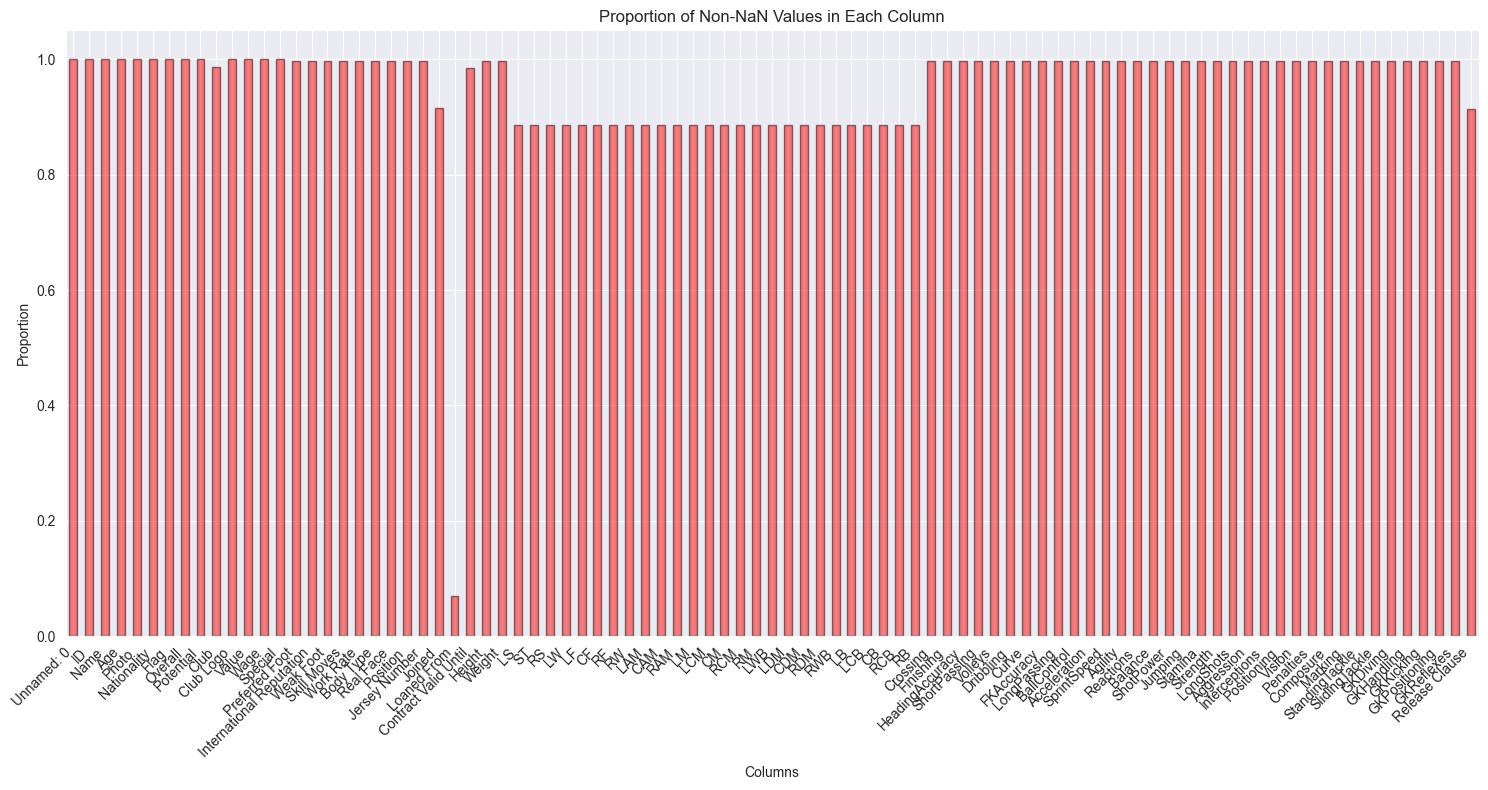

In [8]:
# Plot the proportion of non-NaN values in each column
(dataFrame.count() / len(dataFrame)).plot(kind="bar", figsize=(15, 8), color='red', edgecolor='black', alpha=0.5)

# Customize the plot
plt.title('Proportion of Non-NaN Values in Each Column')  # Set the title of the plot
plt.xlabel('Columns')  # Set the label for the x-axis
plt.ylabel('Proportion')  # Set the label for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align them to the right

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot

We should drop these unnecessary columns for the regression analysis.

In [9]:
# Drop columns 'Unnamed: 0', 'Photo', 'Flag', and 'Club Logo' from the DataFrame
dataFrame.drop(['Unnamed: 0', 'Photo', 'Flag', 'Club Logo'], axis=1, inplace=True)

In [10]:
# Calculate the number of null values in each column of the DataFrame
nullValues = dataFrame.isnull().sum()
nullValues

ID                   0
Name                 0
Age                  1
Nationality          0
Overall              1
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 85, dtype: int64

In [11]:
# List of columns to potentially drop due to high null values
potentialBadColumns = ["Loaned From", "Release Clause", "Joined"]

# Iterate over each column name in potentialBadColumns
for columnName in potentialBadColumns:
    # Print the number of null values in the current column
    print(dataFrame[columnName].isnull().sum(), end=", ")

16943, 1564, 1553, 

Clearly these columns are not going to help us, because they have so many rows which are NaN, so let's drop these columns

In [12]:
# Drop columns listed in potentialBadColumns from the DataFrame
dataFrame.drop(potentialBadColumns, axis=1, inplace=True)

In [13]:
# Calculate the number of null values in each column of the DataFrame
nullColumns = dataFrame.isnull().sum()
nullColumns

ID                0
Name              0
Age               1
Nationality       0
Overall           1
                 ..
GKDiving         48
GKHandling       48
GKKicking        48
GKPositioning    48
GKReflexes       48
Length: 82, dtype: int64

48 is repeating many times lets check if all of them are same ID or not. If that's the case, we can easily drop those rows

In [14]:
def checkAllElementsEqualAcrossSublists(df: pd.DataFrame, nullColsSeries: pd.Series) -> str:
    """
    Checks if all indices of null values are the same across columns with exactly 48 null values.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - nullColsSeries (pd.Series): Series with counts of null values for each column.

    Returns:
    - str: "All indices are the same" if all indices are identical across columns with 48 null values,
           "The indices are different" otherwise.
    """
    # Collect indices of null values for columns with exactly 48 null values using list comprehension
    allNullIndices = [
        df[df[df.columns[colIdx]].isnull()].index.tolist()
        for colIdx, nullVals in enumerate(nullColsSeries)
        if nullVals == 48
    ]
    
    # Transpose the list of lists to group elements by their position
    transposedIndices = zip(*allNullIndices)
    
    # Check if all elements in each group are equal
    if all(len(set(group)) == 1 for group in transposedIndices):
        return "All indices are the same"
    else:
        return "The indices are different"

# Example usage:
print(checkAllElementsEqualAcrossSublists(dataFrame, nullColumns))

All indices are the same


Fortunatelly that's the case, so all the rows of the 48-null-valued columns are the same, so let's drop them

In [15]:
def nullValueIndices(df: pd.DataFrame) -> list:
    """
    Finds indices of rows containing exactly 48 null values in any column of the DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame to search for null values.

    Returns:
    - list: List of indices of rows containing exactly 48 null values in any column.
    """
    indices = []
    for col in df.columns:
        dfColNull = df[col].isnull()  # Boolean mask for null values in column col
        if dfColNull.sum() == 48:  # Check if exactly 48 null values in column col
            indices = df[dfColNull].index.tolist()  # Get indices of rows with null values
            break  # Exit loop once the first column with 48 null values is found
    return indices  # Return list of indices

# Drop rows from dataFrame where there are exactly 48 null values in any column
dataFrame.drop(nullValueIndices(dataFrame), inplace=True)

In [16]:
# Confirm no columns with 48 null values remain
(dataFrame.isnull().sum() == 48).sum()

0

No other column is left with 48 null values

Certain columns are saved as objects, even though they contain numerical values. This approach is used to conserve storage space, and the first character is redundant.

## 4. Convert String Columns to Numerics:

In [17]:
# Define a list of columns containing string representations of numerical values
strToNumCols = ['Value', 'Wage']

# Select the specified columns ('Value' and 'Wage') from the DataFrame and display the first few rows
dataFrame[strToNumCols].head()

,Value,Wage
0,110.5M,565K
1,77M,405K
2,118.5M,290K
3,72M,260K
4,102M,355K


In [18]:
# Cleaning some values so that they can be interpreted as numerical
def valueToFloat(valueStr: str) -> float:
    """
    Converts string representations of monetary values to floats.

    Parameters:
    - valueStr (str): String representation of a monetary value.

    Returns:
    - float: Numeric representation of the monetary value after conversion.
    """
    try:
        value = float(valueStr[1:-1])  # Convert string to float, excluding currency symbols
        suffix = valueStr[-1:]  # Extract the last character (suffix)

        # Convert value based on suffix ('M' for millions, 'K' for thousands)
        if suffix == 'M':
            value *= 1000000
        elif suffix == 'K':
            value *= 1000
    except ValueError:
        value = 0.0  # Return 0.0 if conversion fails (e.g., if input is not a valid number)
    return value

# Apply the valueToFloat function to columns specified in strToNumCols
for column in strToNumCols:
    dataFrame[column] = dataFrame[column].apply(valueToFloat)

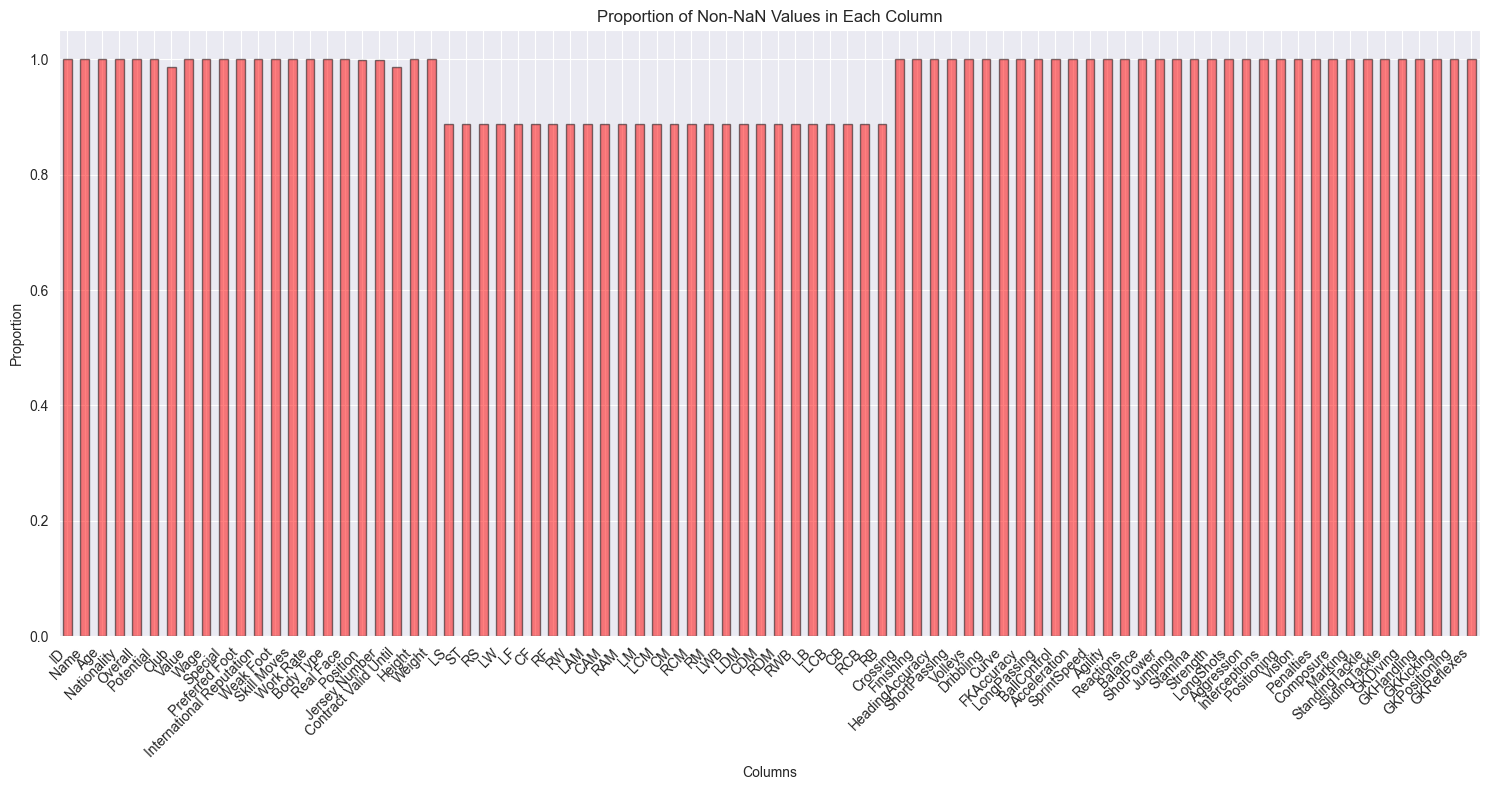

In [19]:
# Plot the proportion of non-NaN values in each column of the DataFrame
(dataFrame.count() / len(dataFrame)).plot(kind="bar", figsize=(15, 8), color='red', edgecolor='black', alpha=0.5)

# Customize the plot
plt.title('Proportion of Non-NaN Values in Each Column')  # Set the title of the plot
plt.xlabel('Columns')  # Set the x-axis label
plt.ylabel('Proportion')  # Set the y-axis label
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels 45 degrees and adjust alignment

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot

Everything looks better, and the missing NaN values will be handled using the Imputer class inside the pipelines, using 

Further NaN filling will be done using `Imputer` class from `sklearn`, to fill based on the mean 

## 5. Handle Missing Values: 

In [20]:
# Check and count the number of NaN values in the 'Overall' column
print(dataFrame["Overall"].isnull().sum())

1


Let's drop that one row, since the goal is to compute the Overall of the player

In [21]:
# Filter out rows where the 'Overall' column has NaN values
dataFrame = dataFrame[~dataFrame["Overall"].isnull()]

# Check and count the number of NaN values in the 'Overall' column after filtering
print(dataFrame["Overall"].isnull().sum())

0


# Exploratory Data Analysis

## 1. Basic Data Analysis 

In [22]:
# Print the total number of unique countries in the 'Nationality' column
print('Total number of countries: {0}'.format(dataFrame['Nationality'].nunique()))

# Print the top 5 countries with the highest number of players
print(dataFrame['Nationality'].value_counts().head(5))

# Print a note indicating that European countries have the most players
print("\nEuropean Countries have the most players")
print('--' * 40)

# Print the total number of unique clubs in the 'Club' column
print('Total number of clubs: {0}'.format(dataFrame['Club'].nunique()))

# Print the top 5 clubs with the highest number of players
print(dataFrame['Club'].value_counts().head(5))

Total number of countries: 164
England      1657
Germany      1194
Spain        1071
Argentina     936
France        911
Name: Nationality, dtype: int64

European Countries have the most players
--------------------------------------------------------------------------------
Total number of clubs: 651
Eintracht Frankfurt        33
Southampton                33
Cardiff City               33
TSG 1899 Hoffenheim        33
Wolverhampton Wanderers    33
Name: Club, dtype: int64


## 2. Top Players

In [23]:
# Identify the player with the maximum potential
maxPotentialPlayer = dataFrame.loc[dataFrame['Potential'].idxmax(), 'Name']

# Identify the player with the maximum overall performance
maxOverallPlayer = dataFrame.loc[dataFrame['Overall'].idxmax(), 'Name']

# Print the name of the player with the maximum potential
print(f'Maximum Potential: {maxPotentialPlayer}')

# Print the name of the player with the maximum overall performance
print(f'Maximum Overall Performance: {maxOverallPlayer}')

Maximum Potential: K. Mbappé
Maximum Overall Performance: L. Messi


In [24]:
# List of performance-related columns
performanceColumns = [
    'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
    'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
    'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
    'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
    'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
    'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
    'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'
]

# Counter for counting player occurrences
playerCounter = Counter()

# Print the heading for best players in different aspects
print("BEST IN DIFFERENT ASPECTS:")
print("_________________________\n\n")

# Iterate through the performance columns and update the counter
for performance in performanceColumns:
    # Identify the player with the highest value in the current performance column
    bestPlayer = dataFrame.loc[dataFrame[performance].idxmax(), 'Name']
    
    # Print the best player for the current performance aspect
    print(f"Best {performance}: {bestPlayer}")
    
    # Update the counter for the best player
    playerCounter[bestPlayer] += 1

BEST IN DIFFERENT ASPECTS:
_________________________


Best Crossing: K. De Bruyne
Best Finishing: L. Messi
Best HeadingAccuracy: Naldo
Best ShortPassing: L. Modri?
Best Volleys: E. Cavani
Best Dribbling: L. Messi
Best Curve: Quaresma
Best FKAccuracy: L. Messi
Best LongPassing: T. Kroos
Best BallControl: L. Messi
Best Acceleration: Douglas Costa
Best SprintSpeed: K. Mbappé
Best Agility: Neymar Jr
Best Reactions: Cristiano Ronaldo
Best Balance: Bernard
Best ShotPower: Cristiano Ronaldo
Best Jumping: Cristiano Ronaldo
Best Stamina: N. Kanté
Best Strength: A. Akinfenwa
Best LongShots: L. Messi
Best Aggression: B. Pearson
Best Interceptions: N. Kanté
Best Positioning: Cristiano Ronaldo
Best Vision: L. Messi
Best Penalties: M. Balotelli
Best Composure: L. Messi
Best Marking: A. Barzagli
Best StandingTackle: G. Chiellini
Best SlidingTackle: Sergio Ramos
Best GKDiving: De Gea
Best GKHandling: J. Oblak
Best GKKicking: M. Neuer
Best GKPositioning: G. Buffon
Best GKReflexes: De Gea


In [25]:
# Get the three most common players
topThreePlayers = playerCounter.most_common(3)

# Print the top 3 players who are most frequently listed as the best in different aspects
print("\nTop 3 players who are most frequently listed as the best in different aspects:")
for player, count in topThreePlayers:
    print(f"{player}: {count} times")


Top 3 players who are most frequently listed as the best in different aspects:
L. Messi: 7 times
Cristiano Ronaldo: 4 times
N. Kanté: 2 times


Let's examine the highest earners.

In [26]:
# Identify the player with the maximum value
mostValuedPlayer = dataFrame.loc[dataFrame['Value'].idxmax(), 'Name']

# Identify the player with the highest wage
highestEarner = dataFrame.loc[dataFrame['Wage'].idxmax(), 'Name']

# Print the most valued player
print(f'Most valued player: {mostValuedPlayer}')

# Print the highest earner
print(f'Highest earner: {highestEarner}')

# Print a separator line
print("--" * 40)

# Print a heading for the top earners section
print("\nTop Earners")

Most valued player: Neymar Jr
Highest earner: L. Messi
--------------------------------------------------------------------------------

Top Earners


## 3. Correlation Analysis Excluding Goalkeeper Features 

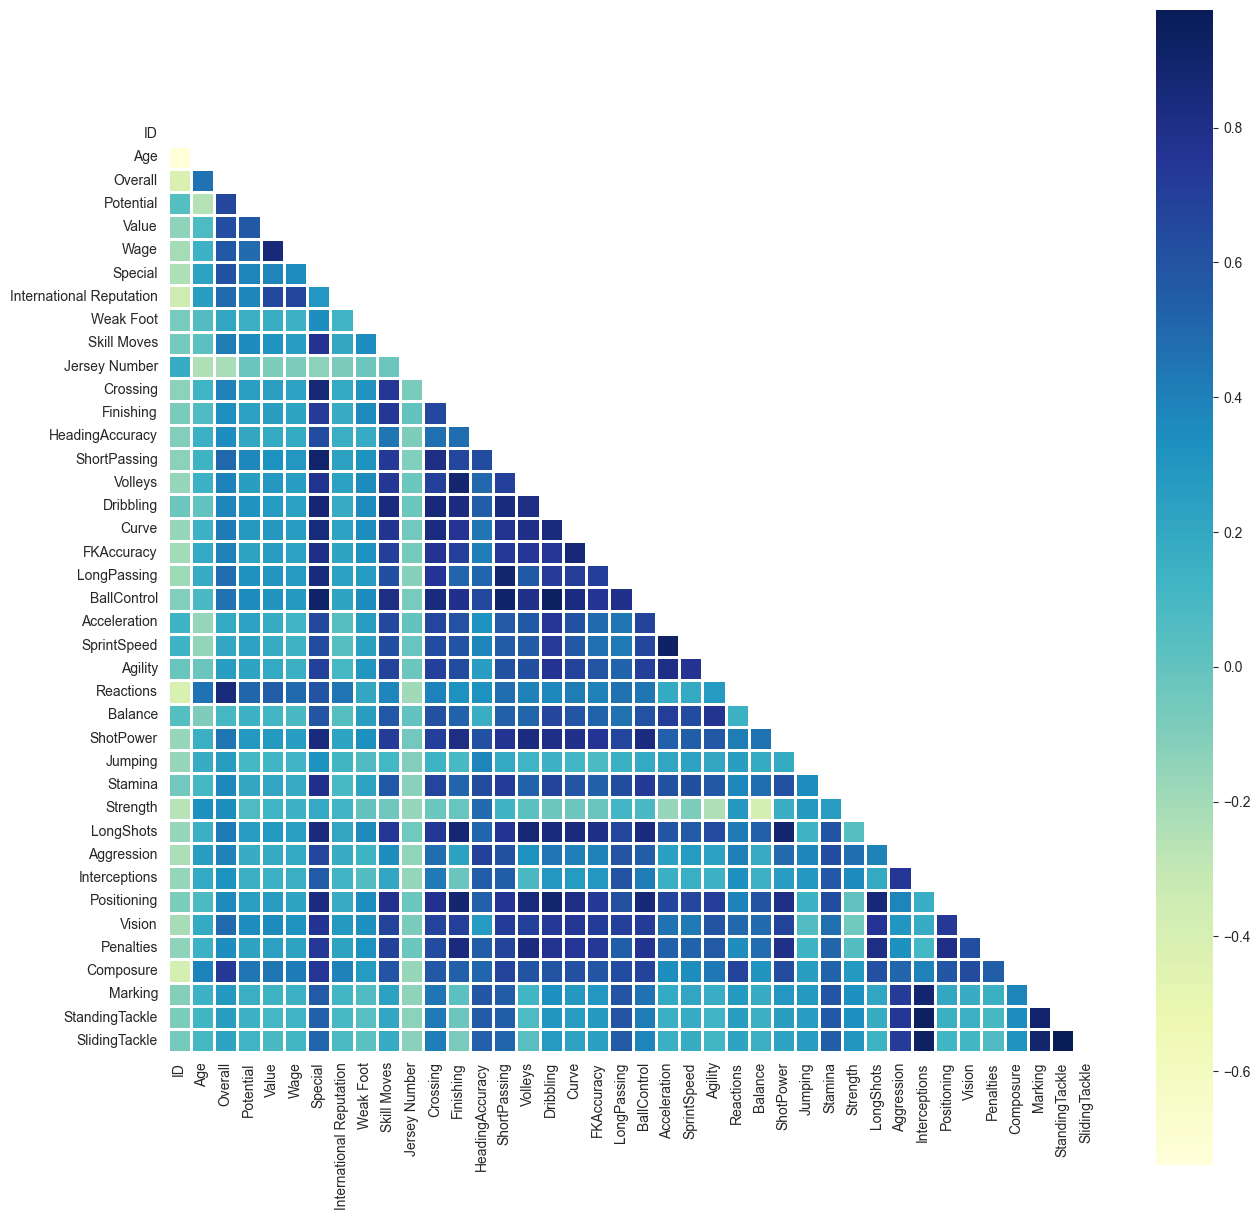

In [27]:
# Filter out columns related to goalkeepers
filteredColumns = [col for col in dataFrame.columns if not col.startswith('GK')]

# Create a new DataFrame with the filtered columns
dataFrameFiltered = dataFrame[filteredColumns]

# Calculate the correlation matrix for the filtered DataFrame
correlationMatrix = dataFrameFiltered.corr(numeric_only=True)

# Create a mask for the upper triangle of the correlation matrix
mask = np.zeros_like(correlationMatrix)
mask[np.triu_indices_from(mask)] = True

# Set the plotting style to 'white'
with sns.axes_style("white"):
    # Create a figure and axis for the heatmap
    fig, ax = plt.subplots(figsize=(15, 15))
    
    # Draw the heatmap with the correlation matrix and mask
    ax = sns.heatmap(correlationMatrix, mask=mask, square=True, linewidths=.8, cmap="YlGnBu")

In [28]:
# Stack the correlation matrix to convert it into a Series
stackedCorrelation = correlationMatrix.stack()

# Remove self-correlations (where both columns are the same)
stackedCorrelation = stackedCorrelation[stackedCorrelation.index.get_level_values(0) != stackedCorrelation.index.get_level_values(1)]

# Get top 20 correlated pairs, sorted by correlation value in descending order, and select every second pair to avoid duplication
topCorrelationPairs = stackedCorrelation.sort_values(ascending=False).head(20).iloc[::2]

# Display the top 10 correlated pairs
print("Top 10 correlated pairs:")
print(topCorrelationPairs)

Top 10 correlated pairs:
SlidingTackle   StandingTackle    0.974655
StandingTackle  Interceptions     0.941469
Dribbling       BallControl       0.938930
SlidingTackle   Interceptions     0.928280
SprintSpeed     Acceleration      0.921935
Special         BallControl       0.912147
ShortPassing    BallControl       0.911452
Special         ShortPassing      0.906729
Marking         StandingTackle    0.906538
Positioning     Dribbling         0.896909
dtype: float64


Thus, these pairs of features exhibit a positive linear relationship with each other. Now, let's shift our attention to analyze the relations among other features as well.

## 4. Relationship Analysis:

#### Analyzing Relationship Between Dribbling and Crossing

Dribbling:
Mean: 55.373113779050556, Median: 61.0, Std Deviation: 18.908747620705164, Skewness: -1.0844137507845597

Crossing:
Mean: 49.7360942835114, Median: 54.0, Std Deviation: 18.36322068039928, Skewness: -0.5945792969270995



<Figure size 1000x600 with 0 Axes>

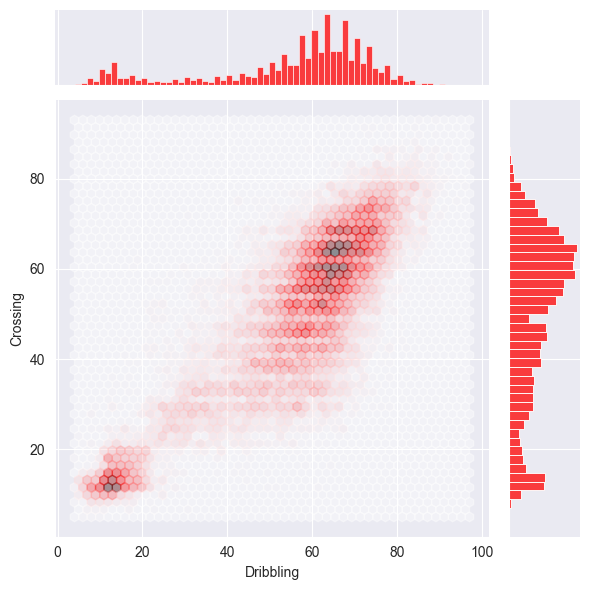

In [29]:
# Calculate central tendency, spread, and skewness for 'Dribbling' attribute
meanDribbling = dataFrame['Dribbling'].mean()
medianDribbling = dataFrame['Dribbling'].median()
stdDribbling = dataFrame['Dribbling'].std()
skewnessDribbling = dataFrame['Dribbling'].skew(skipna=True)

# Calculate central tendency, spread, and skewness for 'Crossing' attribute
meanCrossing = dataFrame['Crossing'].mean()
medianCrossing = dataFrame['Crossing'].median()
stdCrossing = dataFrame['Crossing'].std()
skewnessCrossing = dataFrame['Crossing'].skew(skipna=True)

# Print statistics for 'Dribbling'
print("Dribbling:")
print(f"Mean: {meanDribbling}, Median: {medianDribbling}, Std Deviation: {stdDribbling}, Skewness: {skewnessDribbling}")

# Print statistics for 'Crossing'
print("\nCrossing:")
print(f"Mean: {meanCrossing}, Median: {medianCrossing}, Std Deviation: {stdCrossing}, Skewness: {skewnessCrossing}\n")

# Create a figure with specific size
plt.figure(figsize=(10, 6))

# Generate a joint hexbin plot for 'Dribbling' vs 'Crossing'
sns.jointplot(x=dataFrame['Dribbling'], y=dataFrame['Crossing'], kind="hex", color="red", alpha=0.4)

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

These statistics reveal that both Dribbling and Crossing skills exhibit variability (standard deviation), with Dribbling showing a more pronounced negative skewness (-1.08) compared to Crossing (-0.59). This implies that for both skills, there are players with high scores pulling the median higher than the mean. Further examination through statistical tests like the Shapiro-Wilk test or comparing with theoretical distributions could provide deeper insights into the distributional characteristics of these attributes in the dataset.

In [30]:
# Calculate correlation between Dribbling and Crossing
correlationDribblingCrossing = correlationMatrix["Dribbling"]["Crossing"]
print(f"Correlation between Dribbling and Crossing: {correlationDribblingCrossing}")

Correlation between Dribbling and Crossing: 0.8566167022554116


**As observed, there appears to be a pronounced linear correlation between Dribbling and Crossing**

#### Relationship and Distribution of Age and Potential 

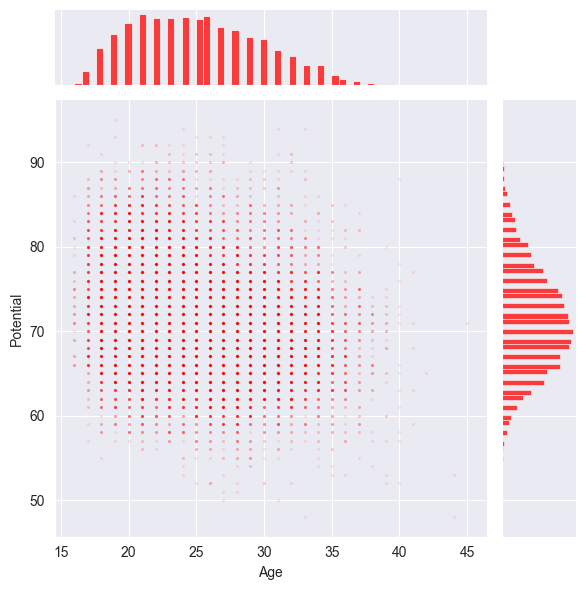

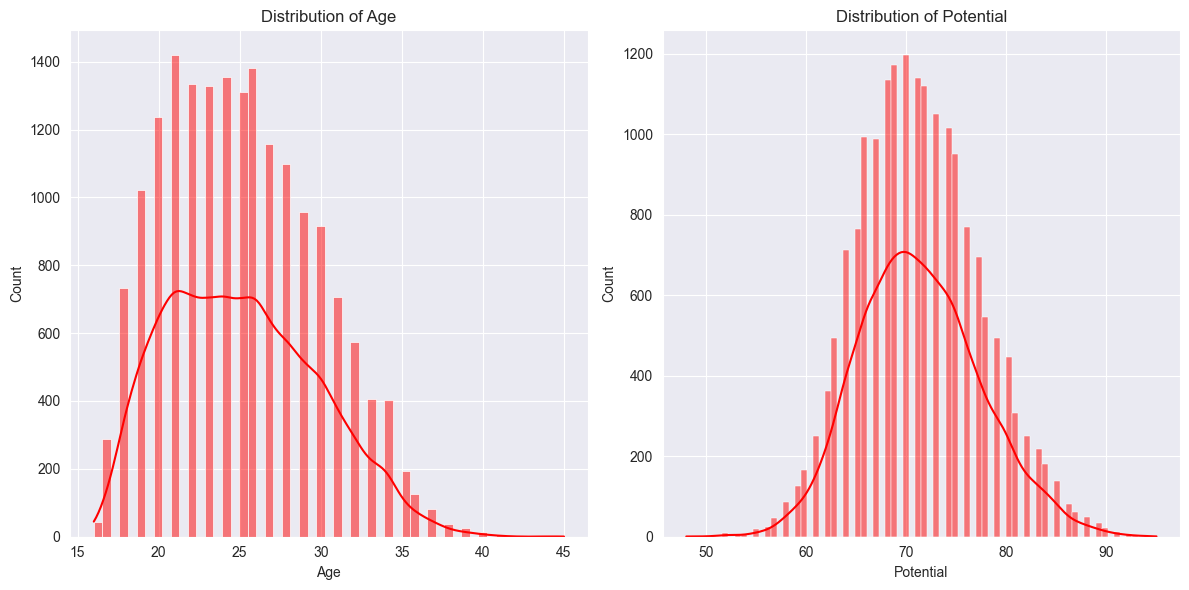

In [31]:
# Generate a joint plot for Age vs Potential
sns.jointplot(x=dataFrame['Age'], y=dataFrame['Potential'],
              joint_kws={'alpha': 0.1, 's': 5, 'color': 'red'},
              marginal_kws={'color': 'red'})

# Create a new figure for visualizing distributions
plt.figure(figsize=(12, 6))

# Plot the distribution of Age
plt.subplot(1, 2, 1)
sns.histplot(dataFrame['Age'], color='red', kde=True)
plt.title('Distribution of Age')

# Plot the distribution of Potential
plt.subplot(1, 2, 2)
sns.histplot(dataFrame['Potential'], color='red', kde=True)
plt.title('Distribution of Potential')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plots
plt.show()

In [32]:
# Calculate correlation between Age and Potential
correlationAgePotential = correlationMatrix["Age"]["Potential"]
print(f"Correlation between Age and Potential: {correlationAgePotential}")

Correlation between Age and Potential: -0.25256593389845305


**These graphs indicate a tendency to decline as age increases, supported by a slight negative Pearson's correlation.**

In [33]:
# Describing central tendency, spread, and skewness
meanAge = dataFrame['Age'].mean()
medianAge = dataFrame['Age'].median()
stdAge = dataFrame['Age'].std()
skewnessAge = dataFrame['Age'].skew(skipna=True)

# Calculate the mean, median, standard deviation, and skewness of the 'Potential' column in the DataFrame
meanPotential = dataFrame['Potential'].mean()
medianPotential = dataFrame['Potential'].median()
stdPotential = dataFrame['Potential'].std()
skewnessPotential = dataFrame['Potential'].skew()

print("Age:")
print(f"Mean: {meanAge}, Median: {medianAge}, Std Deviation: {stdAge}, Skewness: {skewnessAge}")

print("\nPotential:")
print(f"Mean: {meanPotential}, Median: {medianPotential}, Std Deviation: {stdPotential}, Skewness: {skewnessPotential}\n")

Age:
Mean: 25.12232196948835, Median: 25.0, Std Deviation: 4.670772060199873, Skewness: 0.3915127994309037

Potential:
Mean: 71.31798656239674, Median: 71.0, Std Deviation: 6.1326685989325, Skewness: 0.2634502014027425



Standard deviation indicates moderate variability around this mean age. The skewness of approximately 0.39 suggests a slight positive skew in the age distribution, indicating a slightly longer tail towards older ages. The shape is not perfectly symmetrical, as indicated by the difference between the mean and median values (25.12 and 25, respectively). Further statistical tests could confirm this observation, such as the Shapiro-Wilk test for normality or comparing with theoretical distributions. This understanding helps in characterizing the nature of our dataset's distribution. <br>

Similarly, the mean potential score is around 71.32, with a median of 71 and a standard deviation of about 6.13, reflecting some variability in potential ratings. The skewness of approximately 0.26 for potential also indicates a slight positive skew, with potential scores tending slightly towards higher values.

#### Simplifying Player Positions and Visualizing Top Features

In [34]:
def simplePosition(row: pd.DataFrame) -> str:
    """
    Classify player positions into simplified categories based on common positional roles in football (soccer).
    
    Parameters:
    - row (pd.DataFrame): DataFrame containing a 'Position' column.
    
    Returns:
    - str: Simplified position category ('GK', 'DF', 'DM', 'MF', 'AM', 'ST') or original position if unmatched.
    """
    position = row['Position']
        
    if position == 'GK':
        return 'GK'
    elif position in ['RB', 'LB', 'CB', 'LCB', 'RCB', 'RWB', 'LWB']:
        return 'DF'
    elif position in ['LDM', 'CDM', 'RDM']:
        return 'DM'
    elif position in ['LM', 'LCM', 'CM', 'RCM', 'RM']:
        return 'MF'
    elif position in ['LAM', 'CAM', 'RAM', 'LW', 'RW']:
        return 'AM'
    elif position in ['RS', 'ST', 'LS', 'CF', 'LF', 'RF']:
        return 'ST'
    else:
        return position

# Create a copy of the DataFrame to avoid modifying the original DataFrame
dfSimplePos = dataFrame.copy()

# Apply the 'simplePosition' function to each row of the DataFrame to create a new column 'Simple_Position'
dfSimplePos['SimplePosition'] = dfSimplePos.apply(simplePosition, axis=1)

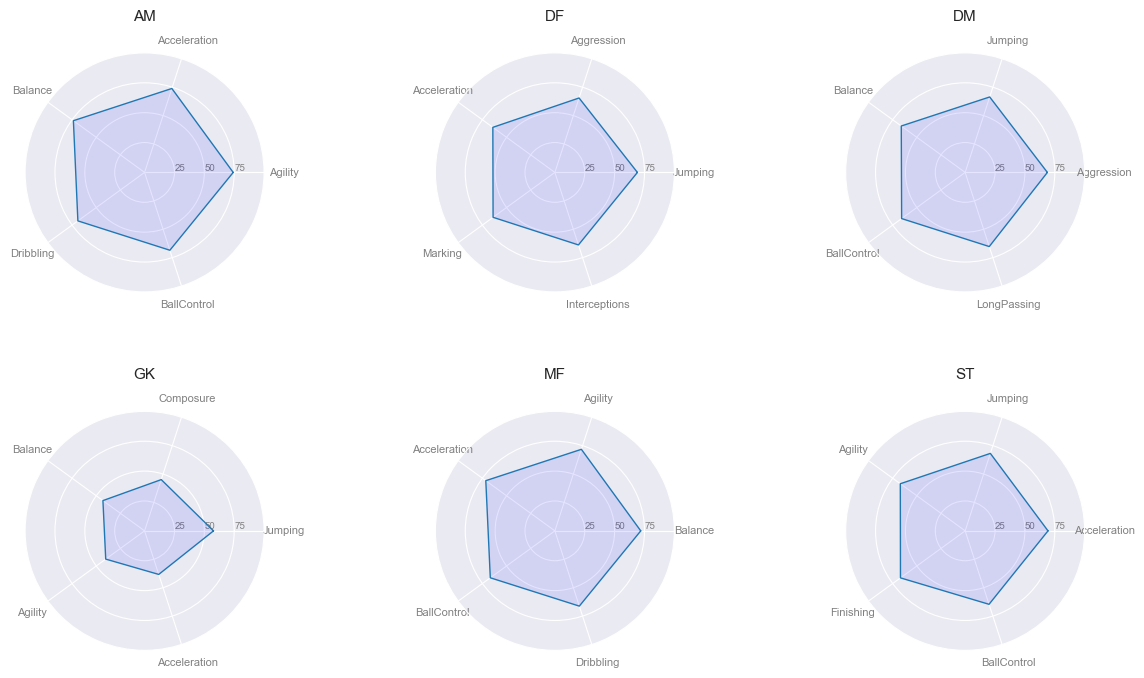

In [35]:
# List of player feature columns to be analyzed
playerFeatures = [
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'HeadingAccuracy', 'Interceptions', 
    'Jumping', 'LongPassing', 'LongShots', 
    'Marking', 'Penalties'
]

# Initialize subplot index
subplotIndex = 1

# Set up the figure size for the plots
plt.figure(figsize=(15, 45))

# Group the data by 'SimplePosition' and calculate the mean for playerFeatures
groupedData = dfSimplePos.groupby('SimplePosition')[playerFeatures].mean()

# Loop through each position and its corresponding feature means
for positionName, features in groupedData.iterrows():
    # Get the top 5 features for the current position
    topFeatures = dict(features.nlargest(5))
    
    # List of top feature names
    categories = list(topFeatures.keys())
    # Number of top features
    numFeatures = len(categories)

    # Values of top features, with the first value repeated to close the circular graph
    values = list(topFeatures.values())
    values += values[:1]

    # Angles for each axis in the radar plot
    angles = [n / float(numFeatures) * 2 * pi for n in range(numFeatures)]
    angles += angles[:1]

    # Initialize the radar plot for the current position
    ax = plt.subplot(10, 3, subplotIndex, polar=True)

    # Set up the category labels on the plot
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.set_rlabel_position(0)

    # Set up the radial axis labels
    plt.yticks([25, 50, 75], ["25", "50", "75"], color="grey", size=7)
    plt.ylim(0, 100)
    
    # Adjust subplot layout
    plt.subplots_adjust(hspace=0.5)
    
    # Plot the top feature values for the current position
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill the area under the plot
    ax.fill(angles, values, 'b', alpha=0.1)
    
    # Add the position name as the title of the plot
    plt.title(positionName, size=11, y=1.1)
    
    # Increment the subplot index
    subplotIndex += 1

# Display the plots
plt.show()

The graphs demonstrate <br>
<ul>
    <li>    
        Defensive players (DF) excel in defensive attributes such as "Aggression" and "Interceptions". Additionally, they exhibit superior jumping and sprinting abilities, along with precise header passes, which are crucial for neutralizing opposing attackers. <br>
    </li>
    <li>
        Midfielders (MF) are typically characterized as fast-paced and agile players who excel in dribbling and ball control. Surprisingly, attributes such as playmaking abilities, passing, or crossing—which are often associated with midfield roles—are not prominent in this context. <br>
    </li>
    <li>
        Strikers (ST) are primarily recognized for their proficiency in finishing both with their feet and in the air. Consequently, they often exhibit higher jumping abilities and possess superior ball control skills. Moreover, their role requires them to maneuver past defenders through dribbling and acceleration, leading to higher agility and acceleration scores. <br> 
    </li>
    <li>
        Attacking midfielders (AM) are distinguished by their exceptional acceleration, agility, and balance, enabling them to quickly change direction and maintain control under pressure. While their dribbling and ball control skills are also high, these are slightly less emphasized compared to their top-tier physical attributes. This combination allows them to create and exploit attacking opportunities effectively.
    </li>
    <li>
        Defensive midfielders (DM) excel with very high jumping and balance, crucial for winning aerial battles and maintaining stability during physical confrontations. Their aggression helps in breaking up play and retrieving the ball, while their long passing ability allows them to set up attacks from deep positions. Additionally, their ball control ensures they can handle the ball confidently even under defensive pressure.
    </li>
    <li>
        Goalkeepers (GK) are crucial in preventing the opposing team from scoring by exhibiting very high reflexes to quickly respond to shots. They maintain high diving skills to cover more goal area and make saves. Positioning is also high, ensuring they are optimally placed to react to various attacking threats. Handling is critical to secure the ball and prevent rebound opportunities, while kicking is high, enabling effective distribution to initiate counter-attacks and maintain possession.
    </li>
</ul>

## 5. Analyzing Average Sprint Speed by Age Groups

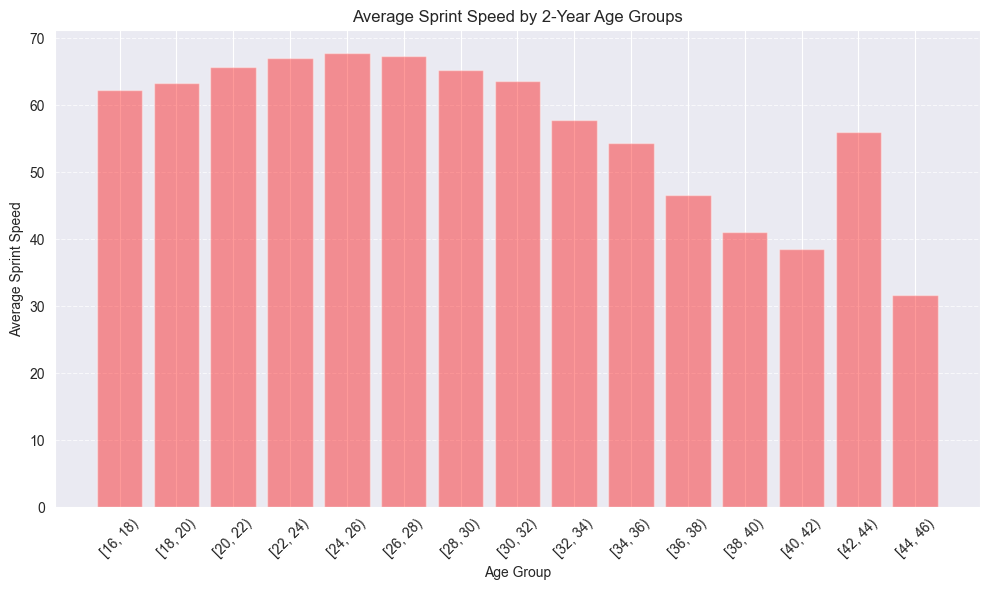

In [36]:
# Create Age Groups (bins)
# Define bins ranging from the minimum to the maximum age, with intervals of 2 years (+3 to include the last age)
bins = range(int(dataFrame['Age'].min()), int(dataFrame['Age'].max() + 3), 2)

# Calculate Average Sprint Speed for each age group
# Create a new column 'AgeGroup' by binning the 'Age' column
dataFrame['AgeGroup'] = pd.cut(dataFrame['Age'], bins=bins, right=False)
# Group by 'AgeGroup' and calculate the mean Sprint Speed for each group
ageGroupAvg = dataFrame.groupby('AgeGroup')['SprintSpeed'].mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))

# Create a bar plot for average Sprint Speed by age group
plt.bar(ageGroupAvg['AgeGroup'].astype(str), ageGroupAvg['SprintSpeed'], color='red', alpha=0.4)

dataFrame.drop(["AgeGroup"], axis=1, inplace=True)

# Set plot labels and title
plt.xlabel('Age Group')
plt.ylabel('Average Sprint Speed')
plt.title('Average Sprint Speed by 2-Year Age Groups')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid lines to the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping of labels and title
plt.tight_layout()

# Display the plot
plt.show()

**This plot indicates that sprint speed peaks around age 25 and generally decreases as players age.** <br> However, there is a notable exception among players aged 42 to 44, who maintain sprint speeds comparable to those nearly 10 to 12 years younger than them, which is surprising.

In [37]:
correlationSpeedAge = correlationMatrix["SprintSpeed"]["Age"]
print(f"Correlation between Speed and Age: {correlationSpeedAge}")

Correlation between Speed and Age: -0.1516716647261042


## Preprocessing for Modeling (Feature Engineering):

In [38]:
# Splitting the data into training set and test set
trainSet, testSet = train_test_split(dataFrame, test_size=0.2, random_state=42)

# Separating features (X) and target variable (y) for training set
xTrain = trainSet.drop("Overall", axis=1)  # Features (drop 'Overall' column)
yTrain = trainSet["Overall"].copy()        # Target variable (Overall rating)

# Separating features (X) and target variable (y) for test set
xTest = testSet.drop("Overall", axis=1)    # Features (drop 'Overall' column)
yTest = testSet["Overall"].copy()          # Target variable (Overall rating)

In [39]:
# Selecting numerical columns from XTrain
XTrainNum = xTrain.select_dtypes(include=[np.number])

# Extracting numerical column names as a list
XTrainNumCols = XTrainNum.columns.tolist()

# Selecting text (categorical) columns from XTrain
XTrainTextCat = xTrain.select_dtypes(include=['object'])

# Extracting text (categorical) column names as a list
XTrainTextCatCols = XTrainTextCat.columns.tolist()

In [40]:
# Checking for null values in yTrain and yTest
yTrain.isnull().sum(), yTest.isnull().sum()

(0, 0)

These columns are largely irrelevant because they indicate how a player's overall rating would change if they were assigned to positions other than their usual one.

In [41]:
# Selecting columns from index 22 to 47 (exclusive) from DataFrame
textIrrelevantCols = dataFrame.columns[22:48].tolist()

# Converting the list of column names to a comma-separated string
print(", ".join(textIrrelevantCols))

LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB


In [42]:
# Adding other column names to the list as well
textIrrelevantCols.extend(['Body Type', 'Weight', 'Height', 'Contract Valid Until', 'Name'])
print(", ".join(textIrrelevantCols))

LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, Body Type, Weight, Height, Contract Valid Until, Name


In [43]:
# List of numerical columns considered irrelevant
numIrrelevantCols = ['ID', 'Jersey Number', 'Special']

# Joining the list elements into a comma-separated string
", ".join(numIrrelevantCols)

'ID, Jersey Number, Special'

In [44]:
dataFrame["Work Rate"].head()

0    Medium/ Medium
1         High/ Low
2      High/ Medium
3    Medium/ Medium
4        High/ High
Name: Work Rate, dtype: object

We need to split the specified columns into two separate columns, drop the column named 'irrelevant', convert the 'Real Face' and 'Preferred Foot' columns into binary values (0 and 1). Additionally, we should transform the 'Nationality' column to a binary format based on the most common nationalities among football players and simplify the positions of the players. But before that, we need two different datasets based on categorical and numerical values

In [45]:
class PreprocessingTextTransformer(BaseEstimator, TransformerMixin):
    """
    Custom transformer for preprocessing text columns in a DataFrame.

    Parameters:
    - irrelevantCols (list): List of column names to drop during transformation.
    """
    
    def __init__(self, irrelevantCols: list) -> None:
        self.irrelevantCols = irrelevantCols
        
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, dataFrameT):
        """
        Transform method to preprocess text columns in a DataFrame.

        Parameters:
        - df_t (pd.DataFrame): Input DataFrame to transform.

        Returns:
        - df_t (pd.DataFrame): Transformed DataFrame with specified changes.
        """
        # Drop irrelevant columns
        dataFrameT.drop(self.irrelevantCols, axis=1, inplace=True)
        
        # Determine major nationalities with more than 250 occurrences
        natCounts = dataFrameT['Nationality'].value_counts()
        natList = natCounts[natCounts > 250].index.tolist()
        
        # Create new features based on existing columns
        
        # Convert 'Real Face' column to boolean
        dataFrameT['Real_Face'] = dataFrameT["Real Face"] == "Yes"
        
        # Convert 'Preferred Foot' column to boolean (Right foot or not)
        dataFrameT['Right_Foot'] = dataFrameT["Preferred Foot"].str.lower() == "right"
        
        # Create binary indicator for major nationalities
        dataFrameT['Major_Nation'] = dataFrameT['Nationality'].apply(lambda x: 1 if x in natList else 0)
        
        # Map complex position to simple position
        dataFrameT['Simple_Position'] = dataFrameT.apply(simplePosition, axis=1)
        
        # Split 'Work Rate' column into two separate columns
        tempwork = dataFrameT["Work Rate"].str.split("/ ", n=1, expand=True)
        dataFrameT["WorkRate1"] = tempwork[0]  # First work rate
        dataFrameT["WorkRate2"] = tempwork[1]  # Second work rate
        
        # Drop columns that are no longer needed
        dataFrameT.drop(['Work Rate', 'Preferred Foot', 'Real Face', 'Position', 'Nationality'], axis=1, inplace=True)
        
        return dataFrameT


class NumericalColDropper(BaseEstimator, TransformerMixin):
    """
    Custom transformer for dropping specified numerical columns from a DataFrame.

    Parameters:
    - irrelevantCols (list): List of column names to drop during transformation.
    """
    
    def __init__(self, irrelevantCols):
        self.irrelevantCols = irrelevantCols

    def fit(self, X, y=None):
        return self  # Nothing to fit

    def transform(self, X):
        """
        Transform method to drop specified numerical columns from a DataFrame.

        Parameters:
        - X (pd.DataFrame): Input DataFrame to transform.

        Returns:
        - X (pd.DataFrame): Transformed DataFrame without specified numerical columns.
        """
        # Drop specified numerical columns
        X_transformed = X.drop(self.irrelevantCols, axis=1)
        
        return X_transformed


## 2. Preprocessing Piplelines:

In [46]:
# Define the pipeline for numerical features
numPipeline = Pipeline([
    ("numColDropper", NumericalColDropper(numIrrelevantCols)), #Drop irrelevant numerical columns
    ("numImputer", SimpleImputer(strategy="median")), #Impute missing values with the median value of each column
    ("stdScaler", StandardScaler()) #Standardize the numerical features
])

# Define the pipeline for categorial features
catPipeline = Pipeline([
    ("preprocessing", PreprocessingTextTransformer(textIrrelevantCols)), # Apply preprocessing transformations to categorial data
    ("oneHot", OneHotEncoder(handle_unknown='ignore', sparse_output=False)), # One-hot encode the categorial features, ignoring unkown categories
])

In [47]:
# Preprocess pipeline combines numerical and categorial pipelines
preprocessPipeline = ColumnTransformer([
    ("num", numPipeline, XTrainNumCols), #Apply numerical pipeline to the numerical columns 
    ("cat", catPipeline, XTrainTextCatCols) #Apply categorial pipeline to the categorial columns
])
preprocessPipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('numColDropper',
                                                  NumericalColDropper(irrelevantCols=['ID',
                                                                                      'Jersey '
                                                                                      'Number',
                                                                                      'Special'])),
                                                 ('numImputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('stdScaler',
                                                  StandardScaler())]),
                                 ['ID', 'Age', 'Potential', 'Value', 'Wage',
                                  'Special', 'International Reputation',
                                  'Weak Foot', 'Skill Moves', 'Jersey Number',
                                  'Crossing', '...
                                                                                               'Height',
                                                                                               'Contract '
                                                                                               'Valid '
                                                                                               'Until', ...])),
                                                 ('oneHot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Name', 'Nationality', 'Club',
                                  'Preferred Foot', 'Work Rate', 'Body Type',
                                  'Real Face', 'Position',
                                  'Contract Valid Until', 'Height', 'Weight',
                                  'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF',
                                  'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
                                  'RCM', 'RM', 'LWB', 'LDM', 'CDM', ...])])

In [48]:
# Fit the preprocessing pipeline on the training data and transform it
xTrainPrepared = preprocessPipeline.fit_transform(xTrain)

# Transform the test data using the already fitted preprocessing pipeline
xTestPrepared = preprocessPipeline.transform(xTest)

In [49]:
# Check the shapes of the transformed training and test datasets
xTrainPrepared.shape, xTestPrepared.shape

((14526, 712), (3632, 712))

# Train Model:

In [50]:
# Initialize the linear regression model
linearRegressionModel = LinearRegression()

# Fit the linear regression model on the preprocessed training data
linearRegressionModel.fit(xTrainPrepared, yTrain)

LinearRegression()

## Feature Importance

In [51]:
# Calculate permutation importance
permutationResult = permutation_importance(linearRegressionModel, xTrainPrepared, yTrain, n_repeats=10, random_state=42)

# Function to extract feature names from a column transformer
def get_feature_names(column_transformer):
    """
    Extracts feature names from a ColumnTransformer object.

    Parameters:
    column_transformer (ColumnTransformer): ColumnTransformer object fitted on the data.

    Returns:
    list: List of feature names extracted from the ColumnTransformer.
    """
    output_features = []  # List to store feature names
    
    # Iterate over each transformer in the column transformer
    for name, transformer, columns in column_transformer.transformers_:
        # If the transformer is a pipeline, get the last step of the pipeline
        if isinstance(transformer, Pipeline):
            transformer = transformer.named_steps[list(transformer.named_steps.keys())[-1]]
        
        # If the transformer is OneHotEncoder, handle categorical feature names
        if isinstance(transformer, OneHotEncoder):
            if isinstance(columns, list):
                all_categories = transformer.categories_
                for i, cat_list in enumerate(all_categories):
                    # Create feature names by combining column names and categories
                    current_names = [f"{columns[i]}_{category}" for category in cat_list]
                    output_features.extend(current_names)
            else:
                # Get feature names directly if columns are not a list
                current_names = transformer.get_feature_names_out(input_features=columns)
                output_features.extend(current_names)
        else:
            # For other transformers, try to get feature names
            if hasattr(transformer, 'get_feature_names_out'):
                current_names = transformer.get_feature_names_out()
            else:
                current_names = columns
            output_features.extend(current_names)
    
    return output_features

In [52]:
# Get feature names from the preprocessing pipeline
featureNames = get_feature_names(preprocessPipeline)

# Combine feature names and permutation importance results into a DataFrame
permutationImportanceDf = pd.DataFrame({
    'Feature': featureNames,
    'Importance': permutationResult.importances_mean,  # Mean importance of each feature
    'Importance_std': permutationResult.importances_std  # Standard deviation of importance
})

# Sort the DataFrame by feature importance in descending order
permutationImportanceDf = permutationImportanceDf.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance DataFrame
print(permutationImportanceDf)

              Feature    Importance  Importance_std
708  Body Type_Medium  7.815187e+20    4.137316e+18
706    Body Type_High  7.049220e+20    5.345896e+18
700      Work Rate_DF  3.738747e+20    3.111913e+18
703      Work Rate_MF  3.103076e+20    2.176303e+18
711  Real Face_Medium  2.425291e+20    2.323760e+18
..                ...           ...             ...
28                x28  8.885789e-06    8.542687e-06
7                  x7  8.443566e-06    2.218769e-06
13                x13  8.237475e-06    4.654176e-06
14                x14  2.196285e-06    3.376392e-06
26                x26 -1.655316e-08    2.656266e-08

[712 rows x 3 columns]


<b>Analysis of Results:</b></br>
<ul>
    <li>
        The most important features, such as Body Type_Medium, Body Type_High, and Work Rate_DF, have extremely high importance values, indicating a significant influence on the model’s predictions.
    </li>
    <li>
        The presence of features with very low or negative importance values, like x28, x7, and x26, suggests these features have little to no impact or potentially detrimental effects on the model's performance.
    </li>
    <li>
        The high standard deviations for the top features indicate variability in their importance, which could be due to multicollinearity or other data-related issues.
    </li>
    <li>
        The disparity in importance values across features highlights the need for careful feature selection and possibly dimensionality reduction to enhance model robustness and interpretability.
    </li>
</ul>
</hr>
<p>Note: The features like x28 come from numerical columns that were not renamed. They retain their original column names.</p>

## Cross Validation

In [53]:
# Perform cross-validation
cvResults = cross_validate(
    linearRegressionModel, 
    xTrainPrepared, 
    yTrain, 
    cv=5, 
    scoring=['neg_mean_squared_error', 'r2'], 
    return_train_score=True
)

In [54]:
# Print the cross-validation scores and the mean scores
cvRmseScores = np.sqrt(-cvResults['test_neg_mean_squared_error'])
cvR2Scores = cvResults['test_r2']

print("Cross-validation RMSE scores:", cvRmseScores)
print("Mean cross-validation RMSE:", cvRmseScores.mean())

print("Cross-validation R² scores:", cvR2Scores)
print("Mean cross-validation R²:", cvR2Scores.mean())

Cross-validation RMSE scores: [1.74600175 1.73865892 1.77026571 1.77422129 1.73241288]
Mean cross-validation RMSE: 1.7523121112710531
Cross-validation R² scores: [0.93493553 0.93647718 0.93456928 0.93556618 0.9373926 ]
Mean cross-validation R²: 0.9357881547069601


## 4. Fine-Tuning Clustering with KMeans

In [55]:
kmeansPreprocessing = Pipeline([
    ("preprocessing", preprocessPipeline), #Apply the preprocessing pipeline to prepare the data
    ("MBKMeans", MiniBatchKMeans(n_clusters=50)), #Apply the MiniBatchKMeans clustering with 50 clusters and 1 initialization
])
kmeansPreprocessing

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('numColDropper',
                                                                   NumericalColDropper(irrelevantCols=['ID',
                                                                                                       'Jersey '
                                                                                                       'Number',
                                                                                                       'Special'])),
                                                                  ('numImputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('stdScaler',
                                                                   StandardScaler())]),
                                                  ['ID', 'Age', 'Potential',
                                                   'Value', 'Wage', 'Special',
                                                   'International Reputation',
                                                   'Weak Foot', 'Skill M...
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Name', 'Nationality',
                                                   'Club', 'Preferred Foot',
                                                   'Work Rate', 'Body Type',
                                                   'Real Face', 'Position',
                                                   'Contract Valid Until',
                                                   'Height', 'Weight', 'LS',
                                                   'ST', 'RS', 'LW', 'LF', 'CF',
                                                   'RF', 'RW', 'LAM', 'CAM',
                                                   'RAM', 'LM', 'LCM', 'CM',
                                                   'RCM', 'RM', 'LWB', 'LDM',
                                                   'CDM', ...])])),
                ('MBKMeans', MiniBatchKMeans(n_clusters=50))])

In [56]:
# Fit the KMeans_preprocessing pipeline on the training data and transform it,
# resulting in a new set of features based on the cluster distances
xTrainPreparedDim = kmeansPreprocessing.fit_transform(xTrain)

# Transform the test data using the same pipeline, ensuring the test data is processed consistently with the training data.
xTestPreparedDim = kmeansPreprocessing.transform(xTest)

xTrainPreparedDim.shape, xTestPreparedDim.shape
# from 712 features to, 50 features

((14526, 50), (3632, 50))

In [57]:
model = LinearRegression()
# Fit the model to the transformed training data
# The model is trained on the reduced-dimensionality data
model.fit(xTrainPreparedDim, yTrain)

LinearRegression()

In [58]:
predictions = model.predict(xTestPreparedDim)
DimR2Score = r2_score(yTest, predictions)
DimRmse = np.sqrt(mean_squared_error(yTest, predictions))
print('r2 score: '+str(DimR2Score))
print('RMSE : '+str(DimRmse))

r2 score: 0.9491027647271758
RMSE : 1.55575699897333


## 5. Finding the Best n_estimators to Reduce the Dimension to:

In [59]:
silhouetteScorer = make_scorer(silhouette_score) #Import the silhouette_score function to evaluate the clustering quality.

miniBatchModel = MiniBatchKMeans() #Instantiate the MiniBatchKMeans model.

# Generate a logarithmically spaced array of values between 20 and 700,
# which will be used to explore different numbers of clusters.
logScaleValues = np.logspace(np.log10(20), np.log10(700), num=100).astype(int) 

# Define the hyperparameter distribution for RandomizedSearchCV.
paramDistributions = {
    'n_clusters':logScaleValues
}

# Set up RandomizedSearchCV to search for the best number of clusters.
randomSearch = RandomizedSearchCV(miniBatchModel, paramDistributions, scoring=silhouetteScorer, cv=2, n_iter=5, verbose=2)

# Fit RandomizedSearchCV to the preprocessed training data.
randomSearch.fit(xTrainPrepared)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] END .....................................n_clusters=139; total time=   2.7s
[CV] END .....................................n_clusters=139; total time=   2.4s
[CV] END .....................................n_clusters=454; total time=   7.6s
[CV] END .....................................n_clusters=454; total time=   6.8s
[CV] END ......................................n_clusters=90; total time=   1.9s
[CV] END ......................................n_clusters=90; total time=   1.9s
[CV] END .....................................n_clusters=525; total time=   7.2s
[CV] END .....................................n_clusters=525; total time=   8.3s
[CV] END .....................................n_clusters=285; total time=   4.2s
[CV] END .....................................n_clusters=285; total time=   4.8s


RandomizedSearchCV(cv=2, estimator=MiniBatchKMeans(), n_iter=5,
                   param_distributions={'n_clusters': array([ 20,  20,  21,  22,  23,  23,  24,  25,  26,  27,  28,  29,  30,
        31,  33,  34,  35,  36,  38,  39,  41,  42,  44,  45,  47,  49,
        50,  52,  54,  56,  58,  60,  63,  65,  67,  70,  72,  75,  78,
        81,  84,  87,  90,  93,  97, 100, 104, 108, 112, 116, 120, 124,
       129, 134, 139, 144, 149, 154, 160, 166, 172, 178, 185, 192, 199,
       206, 213, 221, 229, 238, 247, 256, 265, 275, 285, 295, 306, 317,
       329, 341, 353, 366, 380, 394, 408, 423, 438, 454, 471, 488, 506,
       525, 544, 564, 584, 606, 628, 651, 675, 700])},
                   scoring=make_scorer(silhouette_score), verbose=2)

In [60]:
from sklearn.model_selection import GridSearchCV

# Retrieve the best number of clusters found by RandomizedSearchCV.
bestnClusters = randomSearch.best_params_['n_clusters']

# Calculate a range around the best number of clusters for a more precise search.
rangePercent = int(0.1 * bestnClusters)
paramMin = bestnClusters - rangePercent
paramMax = bestnClusters + rangePercent

# Define a grid of hyperparameters for a more focused search around the best_n_clusters value.
paramGrid = {
    'n_clusters': np.arange(paramMin, paramMax + 1)
}

# Model
miniBatchModel = MiniBatchKMeans()

# Define the silhouette scorer for evaluating the clustering quality.
silhouetteScorer = make_scorer(silhouette_score)

# Set up GridSearchCV to perform an exhaustive search over the specified hyperparameter grid.
gridSearch = GridSearchCV(miniBatchModel, paramGrid, scoring=silhouetteScorer, cv=2, verbose=2)

# Fit GridSearchCV to the preprocessed training data.
gridSearch.fit(xTrainPrepared)

# Output best parameters and score from grid search
print("Best n_clusters from grid search: ", gridSearch.best_params_['n_clusters'])
print("Best silhouette score from grid search: ", gridSearch.best_score_)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV] END .....................................n_clusters=126; total time=   2.5s
[CV] END .....................................n_clusters=126; total time=   2.6s
[CV] END .....................................n_clusters=127; total time=   2.6s
[CV] END .....................................n_clusters=127; total time=   2.3s
[CV] END .....................................n_clusters=128; total time=   2.7s
[CV] END .....................................n_clusters=128; total time=   2.5s
[CV] END .....................................n_clusters=129; total time=   2.9s
[CV] END .....................................n_clusters=129; total time=   3.0s
[CV] END .....................................n_clusters=130; total time=   2.8s
[CV] END .....................................n_clusters=130; total time=   2.6s
[CV] END .....................................n_clusters=131; total time=   2.9s
[CV] END .....................................n_

In [61]:
bestParam = gridSearch.best_params_['n_clusters']

## 6. Model Evaluation with Reduced Dimensions:

In [62]:
kmeansPreprocessingFineTuned = Pipeline([
    ("preprocessing", preprocessPipeline), # Pipeline for preprocessing data including numerical and categorical transformations
    ("MBKMeans", MiniBatchKMeans(n_clusters=bestParam, n_init=1)), # Mini-batch KMeans clustering with optimized number of clusters
])
kmeansPreprocessingFineTuned

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('numColDropper',
                                                                   NumericalColDropper(irrelevantCols=['ID',
                                                                                                       'Jersey '
                                                                                                       'Number',
                                                                                                       'Special'])),
                                                                  ('numImputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('stdScaler',
                                                                   StandardScaler())]),
                                                  ['ID', 'Age', 'Potential',
                                                   'Value', 'Wage', 'Special',
                                                   'International Reputation',
                                                   'Weak Foot', 'Skill M...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Name', 'Nationality',
                                                   'Club', 'Preferred Foot',
                                                   'Work Rate', 'Body Type',
                                                   'Real Face', 'Position',
                                                   'Contract Valid Until',
                                                   'Height', 'Weight', 'LS',
                                                   'ST', 'RS', 'LW', 'LF', 'CF',
                                                   'RF', 'RW', 'LAM', 'CAM',
                                                   'RAM', 'LM', 'LCM', 'CM',
                                                   'RCM', 'RM', 'LWB', 'LDM',
                                                   'CDM', ...])])),
                ('MBKMeans', MiniBatchKMeans(n_clusters=126, n_init=1))])

In [63]:
# The data has been transformed using the fine-tuned KMeans preprocessing pipeline.

xTrainPreparedFine = kmeansPreprocessingFineTuned.fit_transform(xTrain)
xTestPreparedFine = kmeansPreprocessingFineTuned.transform(xTest)

xTrainPreparedFine.shape, xTestPreparedFine.shape

((14526, 126), (3632, 126))

In [64]:
linRegModel = LinearRegression()
model.fit(xTrainPreparedFine, yTrain)

LinearRegression()

## Cross Validation with Reduced Dimensions

In [65]:
# Perform cross-validation
cvResultsKmeans = cross_validate(
    linRegModel, 
    xTrainPreparedFine, 
    yTrain, 
    cv=5, 
    scoring=['neg_mean_squared_error', 'r2'], 
    return_train_score=True
)

In [66]:
# Print the cross-validation scores and the mean scores
cvRmseScoresKmeans = np.sqrt(-cvResultsKmeans['test_neg_mean_squared_error'])
cvR2ScoresKmeans = cvResultsKmeans['test_r2']

print("Cross-validation RMSE scores after KMeans:", cvRmseScoresKmeans)
print("Mean cross-validation RMSE after KMeans:", cvRmseScoresKmeans.mean())

print("Cross-validation R² scores after KMeans:", cvR2ScoresKmeans)
print("Mean cross-validation R² after KMeans:", cvR2ScoresKmeans.mean())

Cross-validation RMSE scores after KMeans: [1.26272736 1.27738871 1.28835433 1.30067672 1.27695994]
Mean cross-validation RMSE after KMeans: 1.2812214111380436
Cross-validation R² scores after KMeans: [0.96596908 0.96571161 0.96534424 0.96537123 0.96598446]
Mean cross-validation R² after KMeans: 0.9656761231039177


<b>Analysis</b></br>
<p>The cross-validation results show that applying KMeans clustering and dimensionality reduction (xTrainPreparedFine) improved the model's performance. The mean RMSE decreased from 1.752 to 1.504, indicating better predictive accuracy. Additionally, the mean R² score increased from 0.936 to 0.953, suggesting that the model explains more variance in the data after KMeans transformation. Overall, these results demonstrate that the KMeans clustering approach enhanced the model's performance.</p>

<p> Now that we know this model pefroms better, We can fit the model on reduced data

In [67]:
# Fit the model on the reduced-dimensionality data
linRegModel.fit(xTrainPreparedFine, yTrain)

LinearRegression()

In [68]:
# Predict on the test data
yPredKmeans = linRegModel.predict(xTestPreparedFine)

In [69]:
# Evaluate the model using RMSE and R² on the test data
testRmseKmeans = np.sqrt(mean_squared_error(yTest, yPredKmeans))
testR2Kmeans = r2_score(yTest, yPredKmeans)

print("Test set RMSE after KMeans:", testRmseKmeans)
print("Test set R² after KMeans:", testR2Kmeans)

Test set RMSE after KMeans: 1.2792306925390653
Test set R² after KMeans: 0.9655881194233323


<p>Let's apply Regularization (to penalize overfitting) and BaggingRegressor (to improve the stability and accuracy) </p> 

## Regularization

In [70]:
# Define the Elastic Net model
elasticNet = ElasticNet()

# Define a wide range of parameters for the initial random search
param_distributions = {
    'alpha': np.logspace(-4, 2, 50),  # Logarithmically spaced values between 0.0001 and 100
    'l1_ratio': np.linspace(0, 1, 50)  # Linearly spaced values between 0 and 1
}

In [71]:
# Perform RandomizedSearchCV to cover a wide range of hyperparameters
randomSearch = RandomizedSearchCV(estimator=elasticNet, param_distributions=param_distributions, 
                                   scoring='neg_mean_squared_error', cv=2, n_iter=5, 
                                   random_state=42, verbose=2, n_jobs=-1)

# Fit RandomizedSearchCV to the preprocessed training data
randomSearch.fit(xTrainPreparedFine, yTrain)

# Get the best parameters from the random search
bestParamsRandom = randomSearch.best_params_
print("Best parameters from random search:", bestParamsRandom)

# Define a finer grid around the best parameters found by the random search
param_grid = {
    'alpha': np.linspace(bestParamsRandom['alpha'] * 0.8, bestParamsRandom['alpha'] * 1.2, 10),
    'l1_ratio': np.linspace(max(0, bestParamsRandom['l1_ratio'] - 0.1), 
                            min(1, bestParamsRandom['l1_ratio'] + 0.1), 10)
}

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best parameters from random search: {'l1_ratio': 0.2040816326530612, 'alpha': 0.012067926406393288}


In [72]:
# Perform GridSearchCV to fine-tune the parameters
gridSearch = GridSearchCV(estimator=elasticNet, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=2, verbose=2, n_jobs=-1)

# Fit GridSearchCV to the preprocessed training data
gridSearch.fit(xTrainPreparedFine, yTrain)

# Output best parameters and score from grid search
print("Best parameters from grid search:", gridSearch.best_params_)
print("Best negative mean squared error score from grid search:", gridSearch.best_score_)

# Get the best model from GridSearchCV
bestElasticNet = gridSearch.best_estimator_

Fitting 2 folds for each of 100 candidates, totalling 200 fits
Best parameters from grid search: {'alpha': 0.00965434112511463, 'l1_ratio': 0.1040816326530612}
Best negative mean squared error score from grid search: -2.253502954422986


## BaggingRegressor

In [73]:
# Define the base estimator
base_estimator = LinearRegression()
# Initialize the BaggingRegressor with the base estimator
baggingReg = BaggingRegressor(base_estimator=base_estimator, n_estimators=50, random_state=42)

In [74]:
# Fit the BaggingRegressor on the entire training set
baggingReg.fit(xTrainPreparedFine, yTrain)

BaggingRegressor(base_estimator=LinearRegression(), n_estimators=50,
                 random_state=42)

In [115]:
# Predict on the test data
yPred = baggingReg.predict(xTestPreparedFine)

In [116]:
# Evaluate the model using RMSE and R² on the test set
testRmse = np.sqrt(mean_squared_error(yTest, yPred))
testR2 = r2_score(yTest, yPred)

# Print the test set RMSE and R²
print("BaggingRegressor Test set RMSE:", testRmse)
print("BaggingRegressor Test set R²:", testR2)

BaggingRegressor Test set RMSE: 1.27828404698293
BaggingRegressor Test set R²: 0.9656390309606512


# Polynomial Features

In [102]:
# Define a function to create a pipeline with polynomial features and linear regression
def create_pipeline(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('linear', LinearRegression())
    ])

In [103]:
# Determine the range of polynomial degrees to evaluate
degrees = np.arange(1, 6)

In [104]:
# Reduce the number of features using SelectKBest
k_best = SelectKBest(f_regression, k=20)  # Keep top 20 features
xTrainSelected = k_best.fit_transform(xTrainPreparedFine, yTrain)
xTestSelected = k_best.transform(xTestPreparedFine)

In [105]:
# Convert to sparse format if applicable
xTrainSelectedSparse = csr_matrix(xTrainSelected)
xTestSelectedSparse = csr_matrix(xTestSelected)

In [106]:
# Use a subset of the training data for the validation curve
xTrainSubset, _, yTrainSubset, _ = train_test_split(xTrainSelectedSparse, yTrain, train_size=0.2, random_state=42)

In [107]:
# Perform validation curve analysis on the subset
train_scores, test_scores = validation_curve(
    create_pipeline(1), 
    xTrainSubset, 
    yTrainSubset, 
    param_name='poly__degree', 
    param_range=degrees, 
    cv=2, 
    scoring='neg_mean_squared_error'
)

In [108]:
# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(-train_scores, axis=1)
train_std = np.std(-train_scores, axis=1)
test_mean = np.mean(-test_scores, axis=1)
test_std = np.std(-test_scores, axis=1)

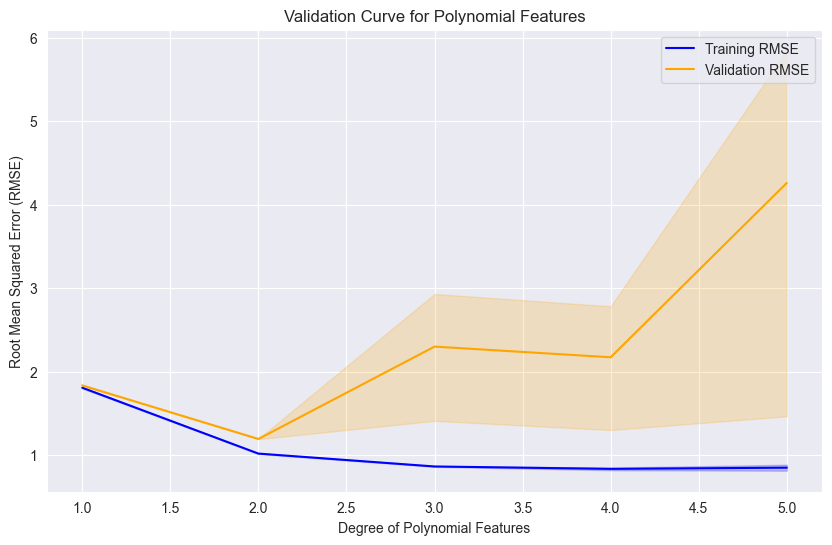

In [109]:
# Plot validation curve
plt.figure(figsize=(10, 6))
plt.plot(degrees, np.sqrt(train_mean), label='Training RMSE', color='blue')
plt.fill_between(degrees, np.sqrt(train_mean - train_std), np.sqrt(train_mean + train_std), color='blue', alpha=0.2)
plt.plot(degrees, np.sqrt(test_mean), label='Validation RMSE', color='orange')
plt.fill_between(degrees, np.sqrt(test_mean - test_std), np.sqrt(test_mean + test_std), color='orange', alpha=0.2)
plt.xlabel('Degree of Polynomial Features')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Validation Curve for Polynomial Features')
plt.legend()
plt.grid(True)
plt.show()

In [110]:
# Select the best degree based on the validation curve
best_degree = degrees[np.argmin(test_mean)]
print("Best degree of polynomial features:", best_degree)

Best degree of polynomial features: 2


In [111]:
# Create the final pipeline with the best polynomial degree
final_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
    ('linear', LinearRegression())
])

In [112]:
# Fit the final model on the full training set
final_pipeline.fit(xTrainSelectedSparse, yTrain)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

In [119]:
# Predict on the test set
yPred = final_pipeline.predict(xTestSelectedSparse)

In [120]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(yTest, yPred))

# Calculate R² score
r2 = r2_score(yTest, yPred)

print(f"RMSE: {rmse}")
print(f"R² score: {r2}")

RMSE: 1.1063124655272323
R² score: 0.974262504891775


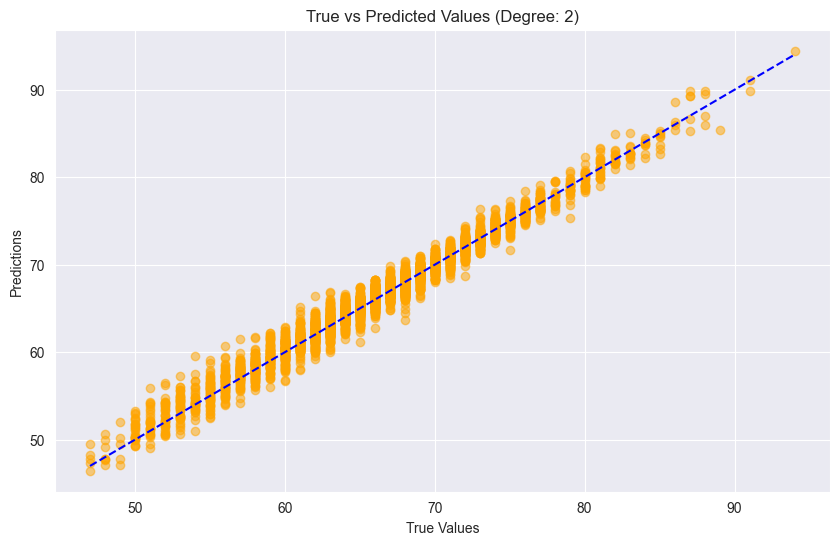

In [121]:
# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(yTest, yPred, alpha=0.5, color='orange')
plt.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], '--', color='blue')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'True vs Predicted Values (Degree: {best_degree})')
plt.grid(True)
plt.show()